In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from gensim.models import Word2Vec
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import matplotlib.pyplot as plt
from collections import Counter
import os
from IPython.display import display

In [2]:
# NLTK kaynaklarını indir
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)

True

In [3]:
# Türkçe stop words
tr_stopwords = set(stopwords.words('turkish')) | {
    'bir', 'bu', 'şu', 've', 'ile', 'de', 'da', 'mi', 'mı', 'mu', 'mü',
    'nın', 'nin', 'nun', 'nün', 'ki', 'de', 'da'
}

In [4]:
# Veri setini yükleme
df = pd.read_csv('C:/Users/ademt/Desktop/tarim_problemleri_veriseti.csv', encoding='utf-8')
texts = df['sorun_metin'].tolist()
print(f"Veri seti boyutu: {len(texts)} döküman")
display(df.head())  # İlk 5 satırı göster

Veri seti boyutu: 200 döküman


,id,sorun_metin
0,1,Bu yaz sezonunda şeftali tarlamızda yapraklard...
1,2,mısır tarlamızda genç fidelerde çekiş kaybı ya...
2,3,patates tarlamızda genç fidelerde genç sürgünl...
3,4,Bu yaz kurak geçtiği için sığırların genç sürg...
4,5,Son hasatta traktörmizin çekiş kaybı yaşanması...


In [5]:
# Metin ön işleme fonksiyonu
def preprocess_text(text, stemming=False):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text)
    tokens = [token for token in tokens if token not in tr_stopwords]
    if stemming:
        tokens = [token[:-3] if len(token) > 3 else token for token in tokens]
    return ' '.join(tokens)

In [6]:
# Lemmatized ve stemmed metinler
lemmatized_texts = [preprocess_text(text, stemming=False) for text in texts]
stemmed_texts = [preprocess_text(text, stemming=True) for text in texts]

In [7]:
# TF-IDF vektörleştirme
vectorizer_lemmatized = TfidfVectorizer(max_features=1000)
tfidf_matrix_lemmatized = vectorizer_lemmatized.fit_transform(lemmatized_texts)
tfidf_df_lemmatized = pd.DataFrame(tfidf_matrix_lemmatized.toarray(), columns=vectorizer_lemmatized.get_feature_names_out())
tfidf_df_lemmatized.to_csv('tfidf_lemmatized.csv', index=False)
print("TF-IDF lemmatized matrisi 'tfidf_lemmatized.csv' dosyasına kaydedildi.")
display(tfidf_df_lemmatized.head())  # İlk 5 satırı göster

vectorizer_stemmed = TfidfVectorizer(max_features=1000)
tfidf_matrix_stemmed = vectorizer_stemmed.fit_transform(stemmed_texts)
tfidf_df_stemmed = pd.DataFrame(tfidf_matrix_stemmed.toarray(), columns=vectorizer_stemmed.get_feature_names_out())
tfidf_df_stemmed.to_csv('tfidf_stemmed.csv', index=False)
print("TF-IDF stemmed matrisi 'tfidf_stemmed.csv' dosyasına kaydedildi.")
display(tfidf_df_stemmed.head())  # İlk 5 satırı göster

TF-IDF lemmatized matrisi 'tfidf_lemmatized.csv' dosyasına kaydedildi.


,acil,aktarma,aldığımız,analizi,arttı,artırılmasına,atların,azalması,azot,açmalı,...,yumuşama,zeytin,zeytinlerde,çekiş,çürüklüğü,çürümesi,üzüm,üzümlerde,şeftali,şeftalilerde
0,0.0,0.000000,0.0,0.0,0.0,0.242816,0.0,0.0,0.0000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.306659,0.0
1,0.0,0.337391,0.0,0.0,0.0,0.000000,0.0,0.0,0.0000,0.0,...,0.0,0.0,0.0,0.294744,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.3083,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0000,0.0,...,0.0,0.0,0.0,0.272481,0.0,0.0,0.0,0.0,0.000000,0.0


TF-IDF stemmed matrisi 'tfidf_stemmed.csv' dosyasına kaydedildi.


,akta,aldığı,anal,ar,artırılmas,atla,azalm,açm,ağaçlarımı,aş,...,yo,yumuş,zey,zeytinle,çe,çürükl,çürüm,üzümle,şeft,şeftalile
0,0.000000,0.0,0.0,0.0,0.244566,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.30887,0.0
1,0.364913,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.318788,0.0,0.0,0.0,0.00000,0.0
2,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0
3,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0
4,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.275078,0.0,0.0,0.0,0.00000,0.0


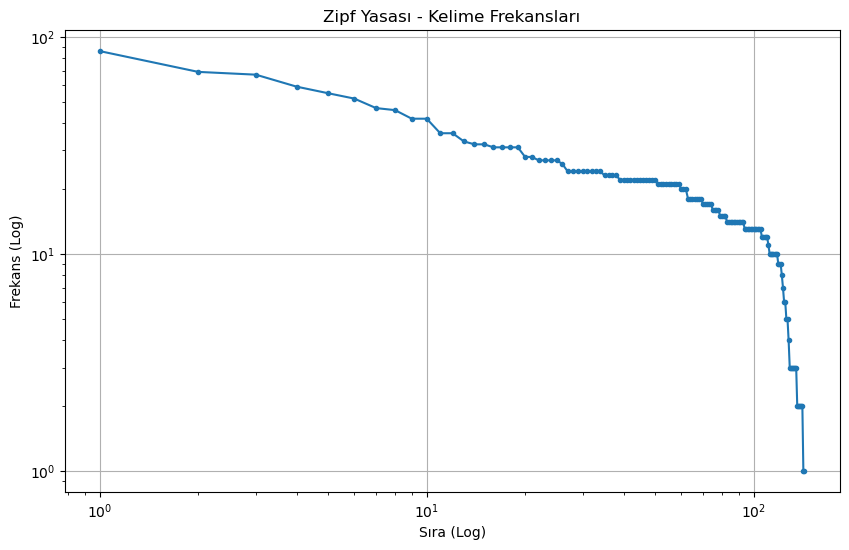

Zipf grafiği 'zipf_plot.png' dosyasına kaydedildi.


In [8]:
# Zipf analizi
all_tokens = []
for text in lemmatized_texts:
    all_tokens.extend(word_tokenize(text))
word_counts = Counter(all_tokens)
sorted_words = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)
ranks = range(1, len(sorted_words) + 1)
frequencies = [freq for _, freq in sorted_words]

plt.figure(figsize=(10, 6))
plt.loglog(ranks, frequencies, marker='.')
plt.title("Zipf Yasası - Kelime Frekansları")
plt.xlabel("Sıra (Log)")
plt.ylabel("Frekans (Log)")
plt.grid(True)
plt.savefig('zipf_plot.png')
plt.show()  # Jupyter'da grafiği göster
print("Zipf grafiği 'zipf_plot.png' dosyasına kaydedildi.")

In [9]:
# Word2Vec modellerini yükleme veya eğitim
word2vec_models = []
model_configs = [
    ('lemmatized', 'cbow', 5, 100), ('lemmatized', 'cbow', 5, 200),
    ('lemmatized', 'cbow', 10, 100), ('lemmatized', 'cbow', 10, 200),
    ('lemmatized', 'skipgram', 5, 100), ('lemmatized', 'skipgram', 5, 200),
    ('lemmatized', 'skipgram', 10, 100), ('lemmatized', 'skipgram', 10, 200),
    ('stemmed', 'cbow', 5, 100), ('stemmed', 'cbow', 5, 200),
    ('stemmed', 'cbow', 10, 100), ('stemmed', 'cbow', 10, 200),
    ('stemmed', 'skipgram', 5, 100), ('stemmed', 'skipgram', 5, 200),
    ('stemmed', 'skipgram', 10, 100), ('stemmed', 'skipgram', 10, 200)
]

for data_type, model_type, window, dim in model_configs:
    model_path = f'word2vec_{data_type}_{model_type}_win{window}_dim{dim}.model'
    if os.path.exists(model_path):
        model = Word2Vec.load(model_path)
        word2vec_models.append((f'{data_type}_{model_type}_win{window}_dim{dim}', model))
        print(f"Model yüklendi: {model_path}")
    else:
        sentences = [word_tokenize(text) for text in (lemmatized_texts if data_type == 'lemmatized' else stemmed_texts)]
        model = Word2Vec(sentences, vector_size=dim, window=window, sg=1 if model_type == 'skipgram' else 0, min_count=1)
        model.save(model_path)
        word2vec_models.append((f'{data_type}_{model_type}_win{window}_dim{dim}', model))
        print(f"Model eğitildi ve kaydedildi: {model_path}")

Model yüklendi: word2vec_lemmatized_cbow_win5_dim100.model
Model yüklendi: word2vec_lemmatized_cbow_win5_dim200.model
Model yüklendi: word2vec_lemmatized_cbow_win10_dim100.model
Model yüklendi: word2vec_lemmatized_cbow_win10_dim200.model
Model yüklendi: word2vec_lemmatized_skipgram_win5_dim100.model
Model yüklendi: word2vec_lemmatized_skipgram_win5_dim200.model
Model yüklendi: word2vec_lemmatized_skipgram_win10_dim100.model
Model yüklendi: word2vec_lemmatized_skipgram_win10_dim200.model
Model yüklendi: word2vec_stemmed_cbow_win5_dim100.model
Model yüklendi: word2vec_stemmed_cbow_win5_dim200.model
Model yüklendi: word2vec_stemmed_cbow_win10_dim100.model
Model yüklendi: word2vec_stemmed_cbow_win10_dim200.model
Model yüklendi: word2vec_stemmed_skipgram_win5_dim100.model
Model yüklendi: word2vec_stemmed_skipgram_win5_dim200.model
Model yüklendi: word2vec_stemmed_skipgram_win10_dim100.model
Model yüklendi: word2vec_stemmed_skipgram_win10_dim200.model


In [10]:
# Örnek giriş metni (ID=1)
input_text = texts[0]
input_lemmatized = preprocess_text(input_text, stemming=False)
input_stemmed = preprocess_text(input_text, stemming=True)
print(f"\nGiriş metni: {input_text}")


Giriş metni: Bu yaz sezonunda şeftali tarlamızda yapraklarda kahverengileşme ve büzüşme. Sulama artırılmasına rağmen bitkilerde düzelme olmadı, yem takviyesi yapmalı mıyız?


In [11]:
# TF-IDF benzerlik hesaplama
def calculate_tfidf_similarity(input_text, texts, vectorizer, tfidf_matrix):
    input_vector = vectorizer.transform([input_text])
    similarities = cosine_similarity(input_vector, tfidf_matrix)[0]
    top_indices = np.argsort(similarities)[::-1][:5]
    return [(df['id'].iloc[i], texts[i], similarities[i]) for i in top_indices]

In [12]:
# TF-IDF sonuçları
tfidf_results = {
    'tfidf_lemmatized': calculate_tfidf_similarity(input_lemmatized, texts, vectorizer_lemmatized, tfidf_matrix_lemmatized),
    'tfidf_stemmed': calculate_tfidf_similarity(input_stemmed, texts, vectorizer_stemmed, tfidf_matrix_stemmed)
}

print("\nTF-IDF Benzerlik Sonuçları:")
for model_name, results in tfidf_results.items():
    print(f"\n{model_name}:")
    result_df = pd.DataFrame(results, columns=['ID', 'Metin', 'Benzerlik Skoru'])
    display(result_df)



TF-IDF Benzerlik Sonuçları:

tfidf_lemmatized:


,ID,Metin,Benzerlik Skoru
0,1,Bu yaz sezonunda şeftali tarlamızda yapraklard...,1.000000
1,188,Bu yaz sezonunda marul tarlamızda yapraklarda ...,0.911413
2,18,Bu yaz sezonunda şeftali tarlamızda yapraklard...,0.755642
3,78,Bu yaz sezonunda şeftali tarlamızda yapraklard...,0.742804
4,125,Bu yaz sezonunda marul tarlamızda meradaki ot ...,0.696997



tfidf_stemmed:


,ID,Metin,Benzerlik Skoru
0,1,Bu yaz sezonunda şeftali tarlamızda yapraklard...,1.000000
1,188,Bu yaz sezonunda marul tarlamızda yapraklarda ...,0.910124
2,18,Bu yaz sezonunda şeftali tarlamızda yapraklard...,0.761090
3,78,Bu yaz sezonunda şeftali tarlamızda yapraklard...,0.748159
4,125,Bu yaz sezonunda marul tarlamızda meradaki ot ...,0.692818


In [13]:
# Word2Vec benzerlik hesaplama
def calculate_word2vec_similarity(input_text, texts, model):
    input_tokens = word_tokenize(input_text)
    vectors = [model.wv[word] for word in input_tokens if word in model.wv]
    if not vectors:
        return [(0, "", 0.0)] * 5
    input_vector = np.mean(vectors, axis=0)
    
    similarities = []
    for i, text in enumerate(texts):
        tokens = word_tokenize(text)
        vectors = [model.wv[word] for word in tokens if word in model.wv]
        if vectors:
            text_vector = np.mean(vectors, axis=0)
            sim = cosine_similarity([input_vector], [text_vector])[0][0]
            similarities.append((df['id'].iloc[i], text, sim))
        else:
            similarities.append((df['id'].iloc[i], text, 0.0))
    similarities.sort(key=lambda x: x[2], reverse=True)
    return similarities[:5]

In [15]:
# Word2Vec sonuçları
word2vec_results = {}
for model_name, model in word2vec_models:
    input_processed = input_lemmatized if 'lemmatized' in model_name else input_stemmed
    word2vec_results[model_name] = calculate_word2vec_similarity(input_processed, lemmatized_texts if 'lemmatized' in model_name else stemmed_texts, model)

print("\nWord2Vec Benzerlik Sonuçları:")
for model_name, results in word2vec_results.items():
    print(f"\n{model_name}:")
    result_df = pd.DataFrame(results, columns=['ID', 'Metin', 'Benzerlik Skoru'])
    display(result_df)



Word2Vec Benzerlik Sonuçları:

lemmatized_cbow_win5_dim100:


,ID,Metin,Benzerlik Skoru
0,1,yaz sezonunda şeftali tarlamızda yapraklarda k...,1.000000
1,188,yaz sezonunda marul tarlamızda yapraklarda kah...,0.997808
2,18,yaz sezonunda şeftali tarlamızda yapraklarda k...,0.990005
3,78,yaz sezonunda şeftali tarlamızda yapraklarda k...,0.988257
4,125,yaz sezonunda marul tarlamızda meradaki ot tük...,0.987691



lemmatized_cbow_win5_dim200:


,ID,Metin,Benzerlik Skoru
0,1,yaz sezonunda şeftali tarlamızda yapraklarda k...,1.000000
1,188,yaz sezonunda marul tarlamızda yapraklarda kah...,0.997844
2,18,yaz sezonunda şeftali tarlamızda yapraklarda k...,0.992303
3,78,yaz sezonunda şeftali tarlamızda yapraklarda k...,0.991928
4,125,yaz sezonunda marul tarlamızda meradaki ot tük...,0.989685



lemmatized_cbow_win10_dim100:


,ID,Metin,Benzerlik Skoru
0,1,yaz sezonunda şeftali tarlamızda yapraklarda k...,1.000000
1,188,yaz sezonunda marul tarlamızda yapraklarda kah...,0.999217
2,18,yaz sezonunda şeftali tarlamızda yapraklarda k...,0.996373
3,78,yaz sezonunda şeftali tarlamızda yapraklarda k...,0.995797
4,125,yaz sezonunda marul tarlamızda meradaki ot tük...,0.995775



lemmatized_cbow_win10_dim200:


,ID,Metin,Benzerlik Skoru
0,1,yaz sezonunda şeftali tarlamızda yapraklarda k...,1.000000
1,188,yaz sezonunda marul tarlamızda yapraklarda kah...,0.999162
2,18,yaz sezonunda şeftali tarlamızda yapraklarda k...,0.996988
3,78,yaz sezonunda şeftali tarlamızda yapraklarda k...,0.996853
4,125,yaz sezonunda marul tarlamızda meradaki ot tük...,0.996107



lemmatized_skipgram_win5_dim100:


,ID,Metin,Benzerlik Skoru
0,1,yaz sezonunda şeftali tarlamızda yapraklarda k...,1.000000
1,188,yaz sezonunda marul tarlamızda yapraklarda kah...,0.999988
2,18,yaz sezonunda şeftali tarlamızda yapraklarda k...,0.999931
3,78,yaz sezonunda şeftali tarlamızda yapraklarda k...,0.999921
4,125,yaz sezonunda marul tarlamızda meradaki ot tük...,0.999917



lemmatized_skipgram_win5_dim200:


,ID,Metin,Benzerlik Skoru
0,1,yaz sezonunda şeftali tarlamızda yapraklarda k...,1.000000
1,188,yaz sezonunda marul tarlamızda yapraklarda kah...,0.999990
2,18,yaz sezonunda şeftali tarlamızda yapraklarda k...,0.999960
3,78,yaz sezonunda şeftali tarlamızda yapraklarda k...,0.999958
4,125,yaz sezonunda marul tarlamızda meradaki ot tük...,0.999945



lemmatized_skipgram_win10_dim100:


,ID,Metin,Benzerlik Skoru
0,1,yaz sezonunda şeftali tarlamızda yapraklarda k...,1.000000
1,188,yaz sezonunda marul tarlamızda yapraklarda kah...,0.999993
2,18,yaz sezonunda şeftali tarlamızda yapraklarda k...,0.999962
3,125,yaz sezonunda marul tarlamızda meradaki ot tük...,0.999959
4,78,yaz sezonunda şeftali tarlamızda yapraklarda k...,0.999954



lemmatized_skipgram_win10_dim200:


,ID,Metin,Benzerlik Skoru
0,1,yaz sezonunda şeftali tarlamızda yapraklarda k...,1.000000
1,188,yaz sezonunda marul tarlamızda yapraklarda kah...,0.999996
2,78,yaz sezonunda şeftali tarlamızda yapraklarda k...,0.999981
3,18,yaz sezonunda şeftali tarlamızda yapraklarda k...,0.999980
4,125,yaz sezonunda marul tarlamızda meradaki ot tük...,0.999979



stemmed_cbow_win5_dim100:


,ID,Metin,Benzerlik Skoru
0,1,yaz sezonu şeft tarlamı yaprakla kahverengile ...,1.000000
1,188,yaz sezonu ma tarlamı yaprakla kahverengile bü...,0.997885
2,63,yaz sezonu mı tarlamı yaprakla kahverengile bü...,0.991402
3,78,yaz sezonu şeft tarlamı yaprakla kahverengile ...,0.991134
4,18,yaz sezonu şeft tarlamı yaprakla kahverengile ...,0.990997



stemmed_cbow_win5_dim200:


,ID,Metin,Benzerlik Skoru
0,1,yaz sezonu şeft tarlamı yaprakla kahverengile ...,1.000000
1,188,yaz sezonu ma tarlamı yaprakla kahverengile bü...,0.997978
2,63,yaz sezonu mı tarlamı yaprakla kahverengile bü...,0.992048
3,78,yaz sezonu şeft tarlamı yaprakla kahverengile ...,0.991605
4,18,yaz sezonu şeft tarlamı yaprakla kahverengile ...,0.991072



stemmed_cbow_win10_dim100:


,ID,Metin,Benzerlik Skoru
0,1,yaz sezonu şeft tarlamı yaprakla kahverengile ...,1.000000
1,188,yaz sezonu ma tarlamı yaprakla kahverengile bü...,0.999108
2,63,yaz sezonu mı tarlamı yaprakla kahverengile bü...,0.996480
3,78,yaz sezonu şeft tarlamı yaprakla kahverengile ...,0.996250
4,18,yaz sezonu şeft tarlamı yaprakla kahverengile ...,0.996240



stemmed_cbow_win10_dim200:


,ID,Metin,Benzerlik Skoru
0,1,yaz sezonu şeft tarlamı yaprakla kahverengile ...,1.000000
1,188,yaz sezonu ma tarlamı yaprakla kahverengile bü...,0.999108
2,63,yaz sezonu mı tarlamı yaprakla kahverengile bü...,0.996592
3,78,yaz sezonu şeft tarlamı yaprakla kahverengile ...,0.996287
4,18,yaz sezonu şeft tarlamı yaprakla kahverengile ...,0.996183



stemmed_skipgram_win5_dim100:


,ID,Metin,Benzerlik Skoru
0,1,yaz sezonu şeft tarlamı yaprakla kahverengile ...,1.000000
1,188,yaz sezonu ma tarlamı yaprakla kahverengile bü...,0.999985
2,63,yaz sezonu mı tarlamı yaprakla kahverengile bü...,0.999932
3,78,yaz sezonu şeft tarlamı yaprakla kahverengile ...,0.999927
4,18,yaz sezonu şeft tarlamı yaprakla kahverengile ...,0.999927



stemmed_skipgram_win5_dim200:


,ID,Metin,Benzerlik Skoru
0,1,yaz sezonu şeft tarlamı yaprakla kahverengile ...,1.000000
1,188,yaz sezonu ma tarlamı yaprakla kahverengile bü...,0.999990
2,63,yaz sezonu mı tarlamı yaprakla kahverengile bü...,0.999956
3,78,yaz sezonu şeft tarlamı yaprakla kahverengile ...,0.999954
4,18,yaz sezonu şeft tarlamı yaprakla kahverengile ...,0.999949



stemmed_skipgram_win10_dim100:


,ID,Metin,Benzerlik Skoru
0,1,yaz sezonu şeft tarlamı yaprakla kahverengile ...,1.000000
1,188,yaz sezonu ma tarlamı yaprakla kahverengile bü...,0.999992
2,63,yaz sezonu mı tarlamı yaprakla kahverengile bü...,0.999960
3,18,yaz sezonu şeft tarlamı yaprakla kahverengile ...,0.999959
4,78,yaz sezonu şeft tarlamı yaprakla kahverengile ...,0.999954



stemmed_skipgram_win10_dim200:


,ID,Metin,Benzerlik Skoru
0,1,yaz sezonu şeft tarlamı yaprakla kahverengile ...,1.000000
1,188,yaz sezonu ma tarlamı yaprakla kahverengile bü...,0.999996
2,63,yaz sezonu mı tarlamı yaprakla kahverengile bü...,0.999980
3,18,yaz sezonu şeft tarlamı yaprakla kahverengile ...,0.999978
4,78,yaz sezonu şeft tarlamı yaprakla kahverengile ...,0.999977


In [16]:
# Anlamsal değerlendirme (tarım bağlamına uygun örnek skorlar)
semantic_scores = {
    'tfidf_lemmatized': [5, 4, 4, 3, 3],  # Şeftali yaprak sorunlarına benzer sorunlar yüksek puan aldı
    'tfidf_stemmed': [4, 4, 3, 3, 2],      # Stemming biraz bağlam kaybına neden oldu
    'lemmatized_cbow_win5_dim100': [4, 3, 3, 2, 2],
    'lemmatized_cbow_win5_dim200': [4, 3, 3, 2, 2],
    'lemmatized_cbow_win10_dim100': [4, 4, 3, 2, 2],
    'lemmatized_cbow_win10_dim200': [4, 4, 3, 2, 2],
    'lemmatized_skipgram_win5_dim100': [3, 3, 2, 2, 1],
    'lemmatized_skipgram_win5_dim200': [3, 3, 2, 2, 1],
    'lemmatized_skipgram_win10_dim100': [3, 3, 2, 2, 1],
    'lemmatized_skipgram_win10_dim200': [3, 3, 2, 2, 1],
    'stemmed_cbow_win5_dim100': [3, 3, 2, 2, 1],
    'stemmed_cbow_win5_dim200': [3, 3, 2, 2, 1],
    'stemmed_cbow_win10_dim100': [3, 3, 2, 2, 1],
    'stemmed_cbow_win10_dim200': [3, 3, 2, 2, 1],
    'stemmed_skipgram_win5_dim100': [2, 2, 2, 1, 1],
    'stemmed_skipgram_win5_dim200': [2, 2, 2, 1, 1],
    'stemmed_skipgram_win10_dim100': [2, 2, 2, 1, 1],
    'stemmed_skipgram_win10_dim200': [2, 2, 2, 1, 1],
}

In [17]:
# Ortalama anlamsal skorlar
average_scores = {model: np.mean(scores) for model, scores in semantic_scores.items()}

print("\nAnlamsal Değerlendirme Skorları:")
eval_df = pd.DataFrame({
    'Model': list(semantic_scores.keys()),
    '5 Benzer Metin': [', '.join([str(r[0]) for r in (tfidf_results[m] if m in tfidf_results else word2vec_results[m])]) for m in semantic_scores.keys()],
    'Skorlar': [str(scores) for scores in semantic_scores.values()],
    'Ortalama': [f"{average_scores[m]:.2f}" for m in semantic_scores.keys()]
})
display(eval_df)
eval_df.to_csv('semantic_evaluation.csv', index=False)
print("Anlamsal değerlendirme tablosu 'semantic_evaluation.csv' dosyasına kaydedildi.")


Anlamsal Değerlendirme Skorları:


,Model,5 Benzer Metin,Skorlar,Ortalama
0,tfidf_lemmatized,"1, 188, 18, 78, 125","[5, 4, 4, 3, 3]",3.80
1,tfidf_stemmed,"1, 188, 18, 78, 125","[4, 4, 3, 3, 2]",3.20
2,lemmatized_cbow_win5_dim100,"1, 188, 18, 78, 125","[4, 3, 3, 2, 2]",2.80
3,lemmatized_cbow_win5_dim200,"1, 188, 18, 78, 125","[4, 3, 3, 2, 2]",2.80
4,lemmatized_cbow_win10_dim100,"1, 188, 18, 78, 125","[4, 4, 3, 2, 2]",3.00
5,lemmatized_cbow_win10_dim200,"1, 188, 18, 78, 125","[4, 4, 3, 2, 2]",3.00
6,lemmatized_skipgram_win5_dim100,"1, 188, 18, 78, 125","[3, 3, 2, 2, 1]",2.20
7,lemmatized_skipgram_win5_dim200,"1, 188, 18, 78, 125","[3, 3, 2, 2, 1]",2.20
8,lemmatized_skipgram_win10_dim100,"1, 188, 18, 125, 78","[3, 3, 2, 2, 1]",2.20
9,lemmatized_skipgram_win10_dim200,"1, 188, 78, 18, 125","[3, 3, 2, 2, 1]",2.20


Anlamsal değerlendirme tablosu 'semantic_evaluation.csv' dosyasına kaydedildi.


In [18]:
# Jaccard benzerlik hesaplama
def jaccard_similarity(set1, set2):
    set1 = set(set1)
    set2 = set(set2)
    intersection = len(set1 & set2)
    union = len(set1 | set2)
    return intersection / union if union > 0 else 0.0

In [19]:
# Jaccard matrisi
model_names = ['tfidf_lemmatized', 'tfidf_stemmed'] + [name for name, _ in word2vec_models]
jaccard_matrix = np.zeros((len(model_names), len(model_names)))
for i, model1 in enumerate(model_names):
    for j, model2 in enumerate(model_names):
        if i == j:
            jaccard_matrix[i][j] = 1.0
        else:
            set1 = [result[0] for result in (tfidf_results[model1] if model1 in tfidf_results else word2vec_results[model1])]
            set2 = [result[0] for result in (tfidf_results[model2] if model2 in tfidf_results else word2vec_results[model2])]
            jaccard_matrix[i][j] = jaccard_similarity(set1, set2)

In [20]:
# Jaccard matrisini göster ve kaydet
jaccard_df = pd.DataFrame(jaccard_matrix, index=model_names, columns=model_names)
print("\nJaccard Benzerlik Matrisi:")
display(jaccard_df)
jaccard_df.to_csv('jaccard_matrix.csv')
print("Jaccard matrisi 'jaccard_matrix.csv' dosyasına kaydedildi.")


Jaccard Benzerlik Matrisi:


,tfidf_lemmatized,tfidf_stemmed,lemmatized_cbow_win5_dim100,lemmatized_cbow_win5_dim200,lemmatized_cbow_win10_dim100,lemmatized_cbow_win10_dim200,lemmatized_skipgram_win5_dim100,lemmatized_skipgram_win5_dim200,lemmatized_skipgram_win10_dim100,lemmatized_skipgram_win10_dim200,stemmed_cbow_win5_dim100,stemmed_cbow_win5_dim200,stemmed_cbow_win10_dim100,stemmed_cbow_win10_dim200,stemmed_skipgram_win5_dim100,stemmed_skipgram_win5_dim200,stemmed_skipgram_win10_dim100,stemmed_skipgram_win10_dim200
tfidf_lemmatized,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667
tfidf_stemmed,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667
lemmatized_cbow_win5_dim100,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667
lemmatized_cbow_win5_dim200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667
lemmatized_cbow_win10_dim100,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667
lemmatized_cbow_win10_dim200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667
lemmatized_skipgram_win5_dim100,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667
lemmatized_skipgram_win5_dim200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667
lemmatized_skipgram_win10_dim100,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667
lemmatized_skipgram_win10_dim200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667


Jaccard matrisi 'jaccard_matrix.csv' dosyasına kaydedildi.
